In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score

In [4]:
df = pd.read_csv("house_mlr_data.csv")

In [5]:
df.head(2)

,size_sqft,bedrooms,price_lakhs
0,800,2,40
1,900,2,45


In [6]:
X = df[['size_sqft']].values
y = df['price_lakhs'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split( X, y,random_state=42, test_size=0.3)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [10]:
mse = cross_val_score(linear_reg_model, X_train, y_train, scoring='neg_mean_squared_error', cv=6)
np.mean(mse)

np.float64(-3.3658065289429835e-29)

In [11]:
pred_value = linear_reg_model.predict(X_test)
# sns.displot(pred_value-y_test, kind='kde')
pred_value

array([80., 45., 65.])

In [14]:
new_pred_value = [[1800]]
my_house_scaled = scaler.transform(new_pred_value)

pred_price = linear_reg_model.predict(my_house_scaled)
print('the new value is: ', pred_price)


the new value is:  [90.]


In [15]:
df

,size_sqft,bedrooms,price_lakhs
0,800,2,40
1,900,2,45
2,1000,3,50
3,1100,3,55
4,1200,3,60
5,1300,4,65
6,1400,4,70
7,1500,4,75
8,1600,5,80
9,1700,5,85


In [16]:
score = r2_score(pred_value, y_test)
score

1.0

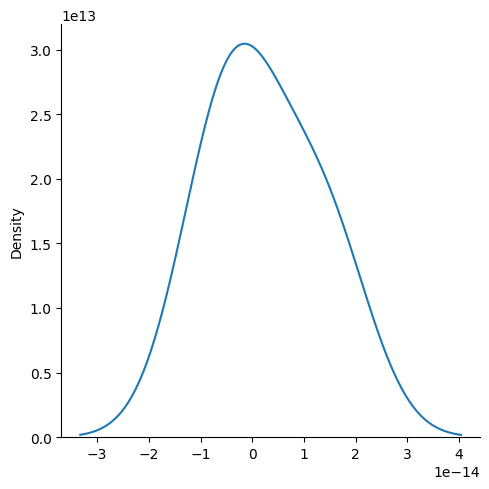

In [17]:
sns.displot(pred_value-y_test, kind='kde')